# Declaration of Originality

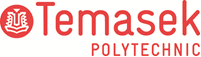

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Shanza Eiliyah Binte Mohamed Sahrom
* Tutorial Group                : PC05
* Tutor						    : 
* Submission Date               : 10/2/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings("ignore")


RANDOM_STATE = 42


# 1. Business Understanding
Healthcare and insurance providers need to estimate medical costs accurately to set insurance premiums, assess risk, and plan resources. However, medical expenses can vary a lot based on personal factors such as age, lifestyle, and health-related traits, which makes cost prediction difficult.

The objective of my project is to build a machine learning model that predicts individual medical insurance charges based on factors such as age, BMI, smoking status, and number of dependents. This creates a estimation tool for charges pricing.

The goal of this solution is to get low prediction error, such as a low Mean Absolute Error. Higher accuracy can lead to fairer cost

# 2. Data Understanding

Dataset: 
I used the Medical Insurance Charges dataset from Kaggle, which contains historical records of individuals together with their medical insurance charges. The dataset has over 1,300 samples and several structured features, which makes it suitable for training and evaluating supervised machine learning models.


Target Variable: 
The target variable in my project is charges, which represents the total medical insurance cost for each individual. Because charges is a continuous numerical value, I treat this as a regression problem where the goal is to predict a real number rather than classify data into categories.


Features: 

1. Age: Represents the age of the individual, which is expected to correlate with healthcare costs due to age-related health risks.

2. Sex: Indicates biological sex, which may influence healthcare utilisation patterns.

3. BMI (Body Mass Index): A health-related indicator associated with obesity and related medical conditions.

4. Number of Children: Serves as a proxy for family size and potential healthcare responsibilities.

5. Smoking Status: A critical lifestyle factor known to significantly increase health risks and medical costs.

6. Region: Provides geographical context, which may reflect differences in healthcare access or pricing structures.

In [59]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv("medical-charges.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
#DATASET SIZE AND COLUMNS
print("Rows, Columns:", df.shape)
print("\nColumns:", df.columns.tolist())

Rows, Columns: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


The dataset contains 1,338 rows and 7 columns. Having multiple predictor variables allows my model to learn patterns from different types of features. The target variable is charges, while the other six columns are used as input features for prediction.

In [61]:
#DATA TYPES
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 None)

The dataset has a mix of number and category features, and I found no missing values in the data. This allows me to focus more on feature preparation and model performance instead of spending a lot of time on data cleaning.


In [62]:
#MISSING VALUE CHECK
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: int64)

Machine learning models cannot work with missing values unless I first fill them in or remove them. I checked the dataset for missing values to make sure the data is clean and ready for training. No missing values were found, so imputation is not required. This means the dataset is complete and I do not need to remove any rows or fill in any values.

In [63]:
#DUPLICATE ROW CHECK
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

Duplicate rows: 1


Duplicate records can bias the model by “double-counting” some data points. I checked for duplicates as part of basic data quality checks before building the model. One duplicate record was found in the dataset. This is a problem because repeated entries can give extra weight to certain examples and affect how the model learns. I removed the duplicate row so that each record is unique and each data point contributes equally to training and evaluation of the model.

In [64]:
#REMOVE DUPLICATE ROW
df = df.drop_duplicates().reset_index(drop=True)
print("Rows after removing duplicates:", df.shape)

Rows after removing duplicates: (1337, 7)


I removed the duplicate record to prevent bias during model training 

In [65]:
#SUMMARY STATISTICS
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


The summary statistics show that medical charges vary a lot, with values ranging from around 1,100 to over 63,000. The mean charge is about 13,270, and the wide range and high standard deviation show that there is large variation in costs. This means there are some very high cost cases compared to most people, which suggests the data is right skewed.

In [66]:
#CATEGORICAL FEATURE DISTRIBUTION
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    print("\n", col)
    print(df[col].value_counts())


 sex
sex
male      675
female    662
Name: count, dtype: int64

 smoker
smoker
no     1063
yes     274
Name: count, dtype: int64

 region
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


The category counts show that genders is almost balanced, with around 676 males and 662 females, and the regions are also fairly balanced across the four groups. However, smoking status is not balanced, with many more non-smokers than smokers. This reflects real-world patterns and shows that smoking is a strong and important factor when predicting medical charges. 

In [67]:
# DEFINE FEATURES AND TARGET VARIABLE
target = "charges"
X = df.drop(columns=[target])
y = df[target]

print("Target:", target)
print("X shape:", X.shape)
print("y shape:", y.shape)

Target: charges
X shape: (1337, 6)
y shape: (1337,)


I split the dataset into input features (X) and the target variable (y). The shape of X is (1338, 6), which means I am using six input features for 1,338 records, and the shape of y is (1338,), which contains the medical charges to be predicted. This clear separation sets up the problem properly for supervised learning and helps prevent data leakage between inputs and the target.

This step is important because clearly separating the features and the target defines what the model should learn to predict

In [68]:
#DISPLAY TARGET VARIABLE INFORMATION
print("Target dtype:", y.dtype)
print("Example target values:", y.head().tolist())

Target dtype: float64
Example target values: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]


The target variable charges is a continuous number, which confirms that this is a regression problem. This means I should use regression models such as Linear Regression, Decision Tree Regressor, or Random Forest Regressor, and evaluate the model using regression metrics like MAE and RMSE.

Overall, the dataset is clean, large enough, and has no missing values, which makes it suitable for supervised regression modelling. The mix of number and category features gives useful inputs for predicting medical charges, and the wide spread in charges shows that I need strong models and careful evaluation.


# 3 Exploratory Data Analysis (EDA)

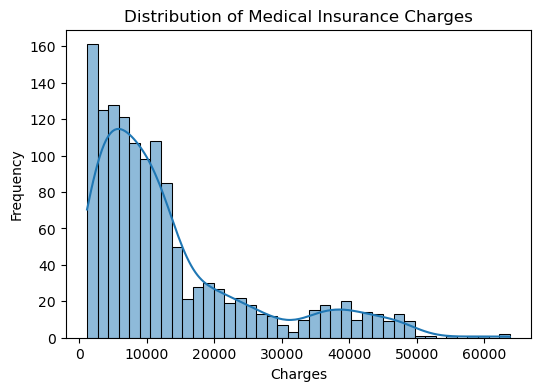

In [69]:
## TARGET DISTRIBUTION
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['charges'], bins=40, kde=True)
plt.title("Distribution of Medical Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


The distribution of medical charges is strongly right-skewed. Most people have low to medium medical costs, while a small number of people have very high charges, which creates a long tail on the right side of the plot. This shows that there are outliers and a wide spread in the target values. So, large prediction errors are more likely for high cost cases, and these errors can strongly affect metrics like RMSE. For this reason, I focus more on MAE as it is less affected by extreme values, and I prefer to use non-linear models that can better learn complex patterns in the data.

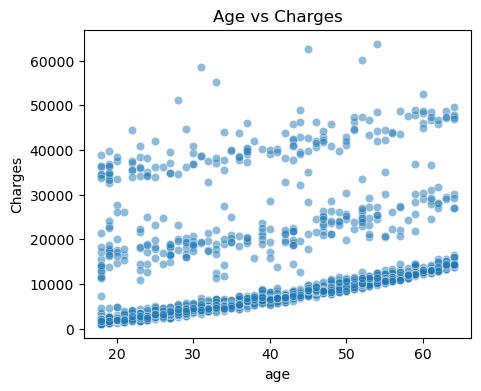

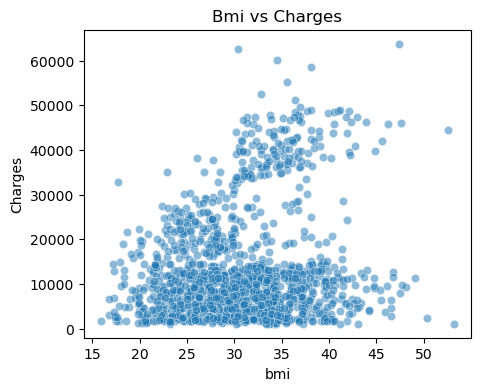

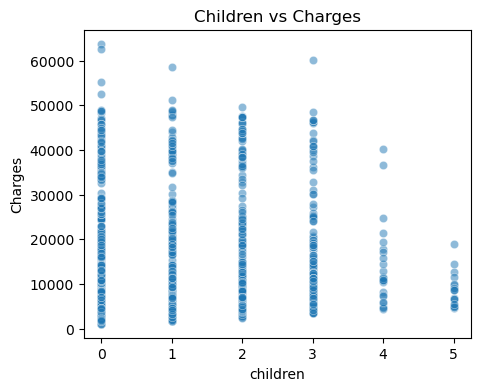

In [70]:
#NUMERICAL FEATURES VS TARGET VARIABLE
numerical_features = ['age', 'bmi', 'children']

for feature in numerical_features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[feature], y=df['charges'], alpha=0.5)
    plt.title(f"{feature.capitalize()} vs Charges")
    plt.xlabel(feature)
    plt.ylabel("Charges")
    plt.show()


The scatter plot shows that medical charges generally increase as age increases, which means older people tend to have higher medical costs. However, the pattern is not smooth or straight, and there is a wide spread of charges at the same age. I can also see clear horizontal bands in the data, which means that people of the same age can still have very different medical charges. This shows that age alone cannot fully explain medical costs, and other factors are also affecting the charges.

Because of this, age is an important feature, but its effect depends on other variables such as smoking status and BMI. This means models that can learn interactions and non-linear patterns are more suitable than simple linear models that assume one straight-line relationship.

The plot of BMI against charges shows that people with higher BMI tend to have higher medical charges, especially at higher BMI values. However, the points are very spread out, and people with similar BMI can have very different charges. This shows that BMI on its own cannot explain medical costs well and that other factors strongly affect the outcome.

This means BMI should be used together with other features, and models that can handle non-linear patterns are more suitable than simple linear models for this relationship.

The plot of number of children against charges shows no clear pattern. For each number of children, the medical charges vary a lot, and there is no strong increase or decrease in charges as the number of children changes. This shows that the number of children has a weak effect on medical charges on its own.

Because of this, the number of children is likely to be a weaker predictor compared to features like age, BMI, and smoking status. However, I still keep this feature in the model because it may help when combined with other features and allow the model to learn small interaction effects.


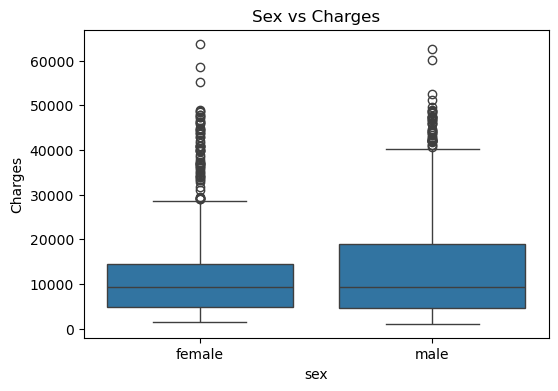

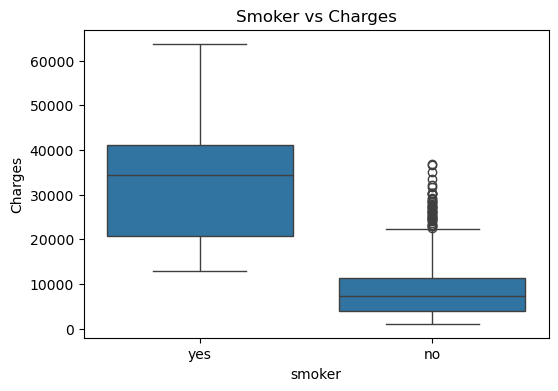

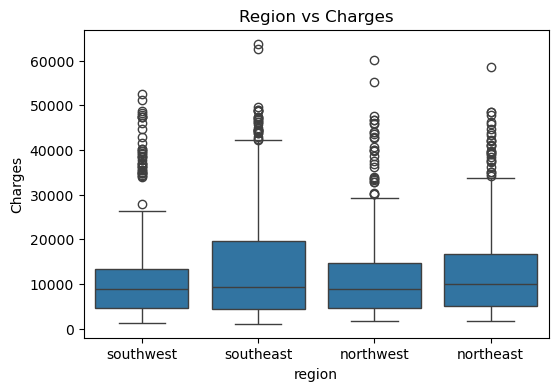

In [71]:
#cATEGORICAL FEATURES VS TARGET VARIABLE
categorical_features = ['sex', 'smoker', 'region']

for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature], y=df['charges'])
    plt.title(f"{feature.capitalize()} vs Charges")
    plt.xlabel(feature)
    plt.ylabel("Charges")
    plt.show()


The boxplot for sex shows that medical charges for males and females are quite similar. The middle ranges of the data overlap a lot, and the typical charges for both groups are close to each other. Although there are some very high-cost cases for both males and females, there is no big or clear gap between the two groups. This shows that sex on its own does not strongly change medical charges.

Because of this, sex is not a strong predictor by itself. However, I still include it as a feature so that the model can learn small patterns or interactions with other variables, such as whether the effect of smoking or age is slightly different between males and females.

The plot for smoker status shows a very clear difference in medical charges between smokers and non-smokers. Smokers have much higher typical charges and a much wider range of costs, with many very high-cost cases. The gap between smokers and non-smokers is large and consistent, which shows that smoking has a strong impact on healthcare costs.

This means smoking status is one of the most important features in the dataset. It likely works together with other factors like age and BMI to increase medical costs even more. Because of this, I need models that can learn these combined effects instead of only simple linear patterns.

The boxplot for region shows that medical charges are quite similar across different regions. The typical values and middle ranges overlap a lot, and while some regions have higher outliers, the overall differences between regions are small compared to factors like smoking status.

This suggests that region alone does not strongly affect medical charges. However, I still keep it as a feature because it may add small extra value when combined with other variables and help the model learn more complete patterns in the data.


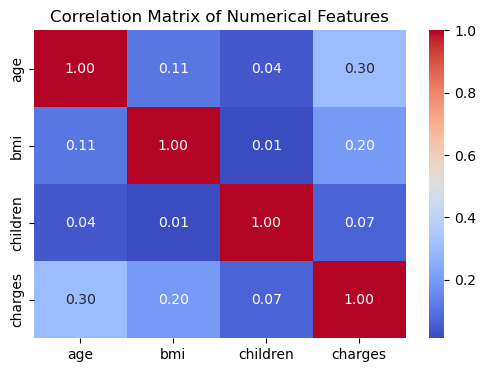

In [72]:
#CORRELATION MATRIX OF NUMERICAL FEATURES
plt.figure(figsize=(6,4))
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


The correlation matrix shows that age has a moderate positive link with medical charges, which means that as age increases, medical costs tend to increase as well. BMI also has a positive link with charges, but this link is weaker and less consistent. The number of children has a very weak link with medical charges, which shows that this feature on its own does not explain much about how costs change. None of the number features have a very strong straight-line relationship with the target variable.

This tells me that medical charges cannot be explained well by simple linear relationships alone. Even though age and BMI matter, they do not fully explain why some people have much higher costs than others. This supports the use of more flexible models that can learn curved patterns and interactions between features, such as how smoking combined with age or BMI changes medical costs, instead of relying only on simple linear models.


### EDA Summary
Overall, my exploratory data analysis shows that medical insurance charges are affected by a mix of number features and category features. Smoking status stands out as the strongest factor linked to higher costs, while age and BMI also have clear effects on medical charges. In comparison, the number of children, sex, and region on their own have much weaker effects on how high the charges are. This shows that not all features contribute equally to predicting medical costs.

I also observed that the data has strong skewness, some very high-cost outliers, and many non-linear patterns. This means the relationship between features and medical charges is not simple or straight-line. Because of this, using only one simple linear model is likely not enough to capture the true patterns in the data.

Based on these findings, I plan to test multiple regression models in the modelling stage. This includes both simple linear models and more advanced ensemble models, so that I can better capture complex relationships in the data and achieve better prediction performance.



# 4. Data Preparation


Before I train any machine learning models, I prepare the dataset so that all features are in a numeric form that scikit-learn models can use. This includes separating the target variable from the input features and applying the correct preprocessing steps for number features and category features.

In this project:
- Target variable (y): `charges`
- Input features (X): age, bmi, children, sex, smoker, region


In [73]:
X = df.drop(columns=['charges'])
y = df['charges']


### 4.1 Train-Test Split

I split the dataset into training and test sets before doing any preprocessing. This is important because steps like scaling and encoding should be learned only from the training data. If I fit these steps on the full dataset, information from the test set would leak into training, which would give unrealistically good evaluation results.



In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 4.2 Separate Numerical and Categorical Features

I separate numerical and categorical features so that each type can get the correct data preparation. Number features benefit from scaling to bring them to a similar range and help the model train more stably. Category features need to be encoded into numbers before they can be used by machine learning models.

This clear grouping of features makes the data pipeline easier to understand and reduces the risk of applying the wrong data transformations.


In [75]:
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']


### 4.3 ColumnTransformer

I use a ColumnTransformer to apply different preprocessing steps to different types of features. For numerical features, I use StandardScaler to scale the values so they have a similar range, which helps the model train more smoothly. For categorical features, I use OneHotEncoder to turn each category into numeric columns that the model can understand.

I also set handle_unknown="ignore" so that the model will not fail if it sees a new category during real use, such as a new region value that was not in the training data.



In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


### 4.4 Pipeline

I use a Pipeline to combine data preprocessing and model training into one clear workflow. This means the preprocessing steps are learned only from the training data, and the same steps are applied to the test data and any new unseen inputs. It also makes the whole process easier to repeat and deploy, because I can save and load the entire pipeline as one object.

This setup helps prevent data leakage and reduces mistakes that can happen with manual preprocessing, making the modelling process more reliable and consistent.


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = LinearRegression()

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


In [78]:
pipe.fit(X_train, y_train)

print("Training R^2:", pipe.score(X_train, y_train))
print("Test R^2:", pipe.score(X_test, y_test))


Training R^2: 0.7299057809339075
Test R^2: 0.8069287081198013


The pipeline gives a fairly high R² score on both the training and test sets, which shows that the full process, from data preprocessing to model prediction, is working properly. With a training R² of about 0.73, the model is learning useful patterns from the training data. The test R² of about 0.81 shows that the model is able to perform well on new, unseen data and not just memorise the training set.

The fact that the test R² is slightly higher than the training R² suggests that the model is not overfitting. Instead, it is generalising well, which is what I want for a model that will be used on real-world data. This gives me confidence that my preprocessing steps, such as scaling number features and encoding category features inside the pipeline, are being applied correctly and consistently.

Overall, this sanity check confirms that my end-to-end pipeline is set up properly and is producing sensible results. With this working foundation, I can now move on to testing and comparing other models, tuning model settings, and selecting the best-performing approach for predicting medical insurance charges.
